## BLOG COMMENT PREDICTIONS


In this assignment you will try to predict the number of comments that a blog post receives based on features of the post. You  will get the data from the [UCI Machine Learning Archive](https://archive.ics.uci.edu/ml/index.php) here: <https://archive.ics.uci.edu/ml/datasets/BlogFeedback>. The data were originally used in a paper by [Krisztian Buza](http://www.cs.bme.hu/~buza/) (2014): Feedback Prediction for Blogs. In Data Analysis, Machine Learning and Knowledge Discovery (pp. 145-152), available at <http://www.cs.bme.hu/~buza/pdfs/gfkl2012_blogs.pdf>.

You will use at least *three* different Machine Learning methods, reporting on the results of each one of them.


### Dataset

In [1]:
# Libraries
import pandas as pd
import numpy as np 
import seaborn as sns

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.sql.functions import *


# Import the training set 
train = spark\
          .read\
          .option("inferSchema", "true")\
          .option("header", "false")\
          .csv("BlogFeedback/Train") 

# Import the test set 
test = spark\
          .read\
          .option("inferSchema", "true")\
          .option("header", "false")\
          .csv("BlogFeedback/Test") 

print("-" * 40)
print("The rows in training set are",train.count())
print("The rows in test set are",test.count())
print("The columns in training set are", len(train.columns))
print("The columns in test set are", len(test.columns))
print("-" * 40)

----------------------------------------
The rows in training set are 52397
The rows in test set are 7624
The columns in training set are 281
The columns in test set are 281
----------------------------------------


* Printing the schema of the dataset, it is possible to see that all variables are stored as "double" type.

In [2]:
# Let's print the schema 
train.printSchema

<bound method DataFrame.printSchema of DataFrame[_c0: double, _c1: double, _c2: double, _c3: double, _c4: double, _c5: double, _c6: double, _c7: double, _c8: double, _c9: double, _c10: double, _c11: double, _c12: double, _c13: double, _c14: double, _c15: double, _c16: double, _c17: double, _c18: double, _c19: double, _c20: double, _c21: double, _c22: double, _c23: double, _c24: double, _c25: double, _c26: double, _c27: double, _c28: double, _c29: double, _c30: double, _c31: double, _c32: double, _c33: double, _c34: double, _c35: double, _c36: double, _c37: double, _c38: double, _c39: double, _c40: double, _c41: double, _c42: double, _c43: double, _c44: double, _c45: double, _c46: double, _c47: double, _c48: double, _c49: double, _c50: double, _c51: double, _c52: double, _c53: double, _c54: double, _c55: double, _c56: double, _c57: double, _c58: double, _c59: double, _c60: double, _c61: double, _c62: double, _c63: double, _c64: double, _c65: double, _c66: double, _c67: double, _c68: dou

* Let's transform into pandas dataframe to visualize better the datasets. 

  --> From the chunck below it turns out that we need to standardize some variables 



In [3]:
# Let's import using pandas to understand better the datasets
print("TRAIN DATA")
pandas_train = pd.read_csv("/Users/admin/Desktop/Spark_Assignment/BlogFeedback/Train/BlogData_train.csv",
                      header = None )
display(pandas_train.head(5))
display(pandas_train.tail(5))

print("* Let's give a look at some useful statistics:")

display(pandas_train.describe())

print("-" * 100)
print("TEST DATA")
pandas_test = pd.read_csv("/Users/admin/Desktop/Spark_Assignment/BlogFeedback/Test/blogData_test-2012.02.01.00_00.csv",
                      header = None )
display(pandas_test.head(5))



TRAIN DATA


,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
52392,33.0,0.0,33.0,33.0,33.0,11.0,15.556349,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52393,33.0,0.0,33.0,33.0,33.0,11.0,15.556349,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52394,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52395,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52396,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Let's give a look at some useful statistics:


,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
count,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,...,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.0,52397.000000,52397.000000,52397.000000
mean,39.444167,46.806717,0.358914,339.853102,24.681661,15.214611,27.959159,0.002748,258.666030,5.829151,...,0.171327,0.162242,0.154455,0.096151,0.088917,0.119167,0.0,1.242094,0.769505,6.764719
std,79.121821,62.359996,6.840717,441.430109,69.598976,32.251189,38.584013,0.131903,321.348052,23.768317,...,0.376798,0.368676,0.361388,0.294800,0.284627,1.438194,0.0,27.497979,20.338052,37.706565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.285714,5.214318,0.000000,29.000000,0.000000,0.891566,3.075076,0.000000,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,10.630660,19.353120,0.000000,162.000000,4.000000,4.150685,11.051215,0.000000,121.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.304670,77.442830,0.000000,478.000000,15.000000,15.998589,45.701206,0.000000,387.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,1122.666600,559.432600,726.000000,2044.000000,1314.000000,442.666660,359.530060,14.000000,1424.000000,588.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,136.000000,0.0,1778.000000,1778.000000,1424.000000


----------------------------------------------------------------------------------------------------
TEST DATA


,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,10.630660,17.882992,1.0,259.0,5.0,4.018276,10.396790,0.0,235.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,43.435825,75.590485,0.0,634.0,20.0,15.998589,44.560870,0.0,473.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.733333,3.043390,0.0,9.0,0.0,0.733333,1.526070,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,27.230215,45.970950,0.0,371.0,14.0,10.784173,24.209942,0.0,228.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,4.500000,6.677075,0.0,18.0,0.5,3.000000,4.000000,0.0,10.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Let's plot the distribution of the target class :
  --> It's extremely zero-inflated

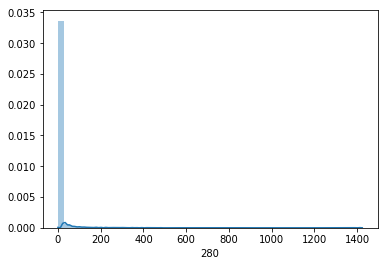

In [4]:
# Plot the target 
sns.distplot(pandas_train[280])

#### Booleans and Numeric columns

In [5]:
# Check binary columns 
bb = [col for col in pandas_train if 
               pandas_train[col].dropna().value_counts().index.isin([0,1]).all()]

# Transform in string 
bool_cols = [str(i) for i in bb]
bool_cols

# Add a character _c to each item 
booleans = ["_c" + bool_col for bool_col  in bool_cols]
print("The total booleans columns are",len(booleans))

# Take a list of the total number of column s
total_columns = train.columns


def diff(first, second):
        second = set(second)
        return [item for item in first if item not in second]
    
numeric = diff(total_columns, booleans)

# Remove the target column from the list
del numeric[-1]
print("The list of numeric columns", numeric)



The total booleans columns are 218
The list of numeric columns ['_c0', '_c1', '_c2', '_c3', '_c4', '_c5', '_c6', '_c7', '_c8', '_c9', '_c10', '_c11', '_c13', '_c14', '_c15', '_c16', '_c17', '_c18', '_c19', '_c20', '_c21', '_c22', '_c23', '_c24', '_c25', '_c26', '_c27', '_c28', '_c29', '_c30', '_c31', '_c33', '_c34', '_c35', '_c36', '_c38', '_c39', '_c40', '_c41', '_c42', '_c43', '_c44', '_c45', '_c46', '_c47', '_c48', '_c49', '_c50', '_c51', '_c52', '_c53', '_c54', '_c55', '_c56', '_c57', '_c58', '_c59', '_c60', '_c61', '_c276', '_c278', '_c279']


* Vector Assembler numeric

In [6]:
# Take label col 
label = train.columns[-1]

# Create assembler num
vec_assembler_num = VectorAssembler(inputCols=numeric, outputCol="features_num")

* Scaling 

In [7]:
# Import `StandardScaler` 
from pyspark.ml.feature import StandardScaler

# Initialize the `standardScaler`
standardScaler = StandardScaler(inputCol= 'features_num', outputCol="features_scaled")

* Vector Assembler  booleans

In [8]:
# Create assembler bool
vec_assembler_bool = VectorAssembler(inputCols=booleans, outputCol="features_bool")

In [9]:
vec_total = VectorAssembler()\
                     .setInputCols(["features_scaled","features_bool"])\
                     .setOutputCol("features")

#### Pipeline

In [10]:
from pyspark.ml import Pipeline

transformation_pipeline = Pipeline()\
                                  .setStages([vec_assembler_num,
                                              standardScaler,
                                              vec_assembler_bool,
                                              vec_total])

#### Fit and Transform 

In [11]:
# Apply the pipeline to training data
fitted_pipeline = transformation_pipeline.fit(train)

# Now that is fitted it's possible to use it to transform the training data
transformed_training = fitted_pipeline.transform(train)

# Optimization:
# I don't want tha pyspark redo the previous steps again and again
# so i cache the data in the memory so the output will be used directly
transformed_training.cache()

DataFrame[_c0: double, _c1: double, _c2: double, _c3: double, _c4: double, _c5: double, _c6: double, _c7: double, _c8: double, _c9: double, _c10: double, _c11: double, _c12: double, _c13: double, _c14: double, _c15: double, _c16: double, _c17: double, _c18: double, _c19: double, _c20: double, _c21: double, _c22: double, _c23: double, _c24: double, _c25: double, _c26: double, _c27: double, _c28: double, _c29: double, _c30: double, _c31: double, _c32: double, _c33: double, _c34: double, _c35: double, _c36: double, _c37: double, _c38: double, _c39: double, _c40: double, _c41: double, _c42: double, _c43: double, _c44: double, _c45: double, _c46: double, _c47: double, _c48: double, _c49: double, _c50: double, _c51: double, _c52: double, _c53: double, _c54: double, _c55: double, _c56: double, _c57: double, _c58: double, _c59: double, _c60: double, _c61: double, _c62: double, _c63: double, _c64: double, _c65: double, _c66: double, _c67: double, _c68: double, _c69: double, _c70: double, _c71: 

In [12]:
#-------
# Apply the pipeline to training data
fitted_pipeline = transformation_pipeline.fit(test)

# Now that is fitted it's possible to use it to transform the training data
transformed_test = fitted_pipeline.transform(test)

# Optimization
transformed_test.cache()

DataFrame[_c0: double, _c1: double, _c2: double, _c3: double, _c4: double, _c5: double, _c6: double, _c7: double, _c8: double, _c9: double, _c10: double, _c11: double, _c12: double, _c13: double, _c14: double, _c15: double, _c16: double, _c17: double, _c18: double, _c19: double, _c20: double, _c21: double, _c22: double, _c23: double, _c24: double, _c25: double, _c26: double, _c27: double, _c28: double, _c29: double, _c30: double, _c31: double, _c32: double, _c33: double, _c34: double, _c35: double, _c36: double, _c37: double, _c38: double, _c39: double, _c40: double, _c41: double, _c42: double, _c43: double, _c44: double, _c45: double, _c46: double, _c47: double, _c48: double, _c49: double, _c50: double, _c51: double, _c52: double, _c53: double, _c54: double, _c55: double, _c56: double, _c57: double, _c58: double, _c59: double, _c60: double, _c61: double, _c62: double, _c63: double, _c64: double, _c65: double, _c66: double, _c67: double, _c68: double, _c69: double, _c70: double, _c71: 

* It's a good time to take stock of what we have done, and see how the data looks like.
  I checked the result with test dataset 

In [13]:
# Check 
transformed_test.select("features_num","features_scaled","features_bool","features",label).show(5)

for line in transformed_test.head(2):
    print(line, '\n')


+--------------------+--------------------+--------------------+--------------------+-----+
|        features_num|     features_scaled|       features_bool|            features|_c280|
+--------------------+--------------------+--------------------+--------------------+-----+
|(62,[0,1,3,5,6,8,...|(62,[0,1,3,5,6,8,...|(218,[7,29,41,59,...|(280,[0,1,3,5,6,8...|  0.0|
|(62,[0,1,2,3,4,5,...|(62,[0,1,2,3,4,5,...|(218,[7,9,19,41,4...|(280,[0,1,2,3,4,5...|  2.0|
|(62,[24,25,27,29,...|(62,[24,25,27,29,...|(218,[208,212],[1...|(280,[24,25,27,29...|  0.0|
|(62,[0,1,3,4,5,6,...|(62,[0,1,3,4,5,6,...|(218,[41,83,91,93...|(280,[0,1,3,4,5,6...|  0.0|
|(62,[24,26,27,28,...|(62,[24,26,27,28,...|(218,[208,214],[1...|(280,[24,26,27,28...|  0.0|
+--------------------+--------------------+--------------------+--------------------+-----+
only showing top 5 rows

Row(_c0=6.004717, _c1=37.53244, _c2=0.0, _c3=347.0, _c4=0.0, _c5=2.6037736, _c6=19.723646, _c7=0.0, _c8=223.0, _c9=0.0, _c10=2.5660377, _c11=19.726

* Looking the output it is possible to see that 4 `SparseVector` has been created. 

  Indeed i set this during the creation of the `Pipeline`. 
  For the Modelling Phase i will use only the `Features` vector.
  

### MODELING

In [14]:
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, GBTRegressor, RandomForestRegressor
from pyspark.ml.regression import GeneralizedLinearRegression
from pyspark.ml.tuning import ParamGridBuilder,TrainValidationSplit
from pyspark.ml.evaluation import RegressionEvaluator

######  ELASTIC NET REGULARIZED  LINEAR REGRESSION

   * The predictions generated are negative due to an huge amount of "0" in the label column of dataframes.
   
     --> This suggest that other models should be more appropiate.

In [24]:
# Linear regression
lr = (LinearRegression(featuresCol= 'features', labelCol = label, predictionCol='pred_label',
                       maxIter=50, regParam=0.3, elasticNetParam= 0.9, fitIntercept = True))
# Fit the data to the model
lrModel = lr.fit(transformed_training)

# Evaluate
test_results_lr = lrModel.evaluate(transformed_test)

# Predictions
predictions_lr = lrModel.transform(transformed_test)

print("RMSE: {}".format(test_results_lr.rootMeanSquaredError))
print("MSE: {}".format(test_results_lr.meanSquaredError))
print("R2: {}".format(test_results_lr.r2))
print("MAE: {}".format(test_results_lr.meanAbsoluteError))



RMSE: 24.703639943489787
MSE: 610.2698264575841
R2: 0.3439674912128392
MAE: 7.936459821252557


In [25]:
# Extract the predictions and the "known" correct labels
predandlabels = predictions_lr.select("pred_label", label)
predandlabels.show(10)

+-------------------+-----+
|         pred_label|_c280|
+-------------------+-----+
| 0.5238836351307414|  0.0|
|  8.019981517866245|  2.0|
| -4.100108415061402|  0.0|
| 0.5876567408130802|  0.0|
|  2.371787252489308|  0.0|
|  -4.37594633338781|  0.0|
|  9.405787556406342|  4.0|
|-1.7885967716086526|  1.0|
|  44.49170632056693|  1.0|
|  8.912400867968412|  0.0|
+-------------------+-----+
only showing top 10 rows



##### TUNING LINEAR REGRESSION
 
   * I tuned the parameters of the elestic net just to play with pyspark MLlib.
   
     It takes approximately 2-3 mins in a 4core-16gb machine for a minimum improvement (RMSE: 24.70 vs RMSE: 24.67)

In [17]:
lr = LinearRegression(featuresCol= 'features', labelCol = label ,maxIter=50)

# We use a ParamGridBuilder to construct a grid of parameters to search over.
# TrainValidationSplit will try all combinations of values and determine best model using
# the evaluator.
paramGrid = ParamGridBuilder()\
    .addGrid(lr.regParam, [0.5,0.45,0.40,0.35,0.30,0.25,0.20,0.15,0.10,0.05,0.01]) \
    .addGrid(lr.fitIntercept, [False, True])\
    .addGrid(lr.elasticNetParam, [0.1,0.2,0.3,0.4, 0.5,0.6,0.7])\
    .build()

# In this case the estimator is simply the linear regression.
# A TrainValidationSplit requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
tvs = TrainValidationSplit(estimator=lr,
                           estimatorParamMaps=paramGrid,
                           evaluator=RegressionEvaluator(labelCol=label, predictionCol="prediction", metricName="rmse"),
                           # 80% of the data will be used for training, 20% for validation.
                           trainRatio=0.8)

In [18]:
# Run TrainValidationSplit, and choose the best set of parameters.
model = tvs.fit(transformed_training)

# Make predictions on test data. model is the model with combination of parameters
# that performed best.

# Make predictions.
predictions = model.transform(transformed_test)

model.transform(transformed_test)\
                .select("features", label, "prediction")\
                .show()
# Evaluator
evaluator=RegressionEvaluator(labelCol=label, predictionCol="prediction", metricName="rmse")
# Rmse
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+--------------------+-----+-------------------+
|            features|_c280|         prediction|
+--------------------+-----+-------------------+
|(280,[0,1,3,5,6,8...|  0.0|0.43008206982286534|
|(280,[0,1,2,3,4,5...|  2.0|  8.070212650989436|
|(280,[24,25,27,29...|  0.0| -4.182908125776822|
|(280,[0,1,3,4,5,6...|  0.0|0.48983671255666383|
|(280,[24,26,27,28...|  0.0| 2.4183083374817036|
|(280,[0,1,3,4,5,6...|  0.0|-4.5127598622357015|
|(280,[0,1,2,3,4,5...|  4.0|  9.389442003133162|
|(280,[0,1,3,5,6,8...|  1.0|-1.8655184529889937|
|(280,[47,48,50,51...|  1.0|  43.99156745567804|
|(280,[0,1,3,4,5,6...|  0.0|   9.15298537038538|
|(280,[0,1,3,5,6,8...|  0.0|  5.164123048248627|
|(280,[0,1,3,4,5,6...|  0.0|  5.251309977306188|
|(280,[0,1,2,3,4,5...|  0.0|  1.913757086417876|
|(280,[0,1,3,5,6,8...|  0.0|-2.5005994246447223|
|(280,[47,48,49,50...|  2.0| -29.82576856958338|
|(280,[52,53,54,55...|  0.0|-1.1329724517204403|
|(280,[52,53,55,56...|  0.0|   3.46235701572886|
|(280,[0,1,3,4,5,6..

##### POISSON MODEL 

   * A limitation of the model is the assumption that the conditional variance = the conditional mean, which may not  always be true. This model is overdispersed (conditional variance > conditional mean), so i will need to use the Negative Binomial model instead.
   
   * Negative Binomial model is not implemented in MLlib

In [26]:
# Poisson Model
glr = GeneralizedLinearRegression(family="Poisson", link="Log",
                                  featuresCol= 'features', labelCol = label, predictionCol='pred_label',
                                  maxIter=10, regParam=0.3)

# Fit the model
glrModel = glr.fit(transformed_training)

# Make predictions.
predictions_glr = glrModel.transform(transformed_test)

# Select example rows to display.
predictions_glr.select("features",label,"pred_label").show(5)

+--------------------+-----+------------------+
|            features|_c280|        pred_label|
+--------------------+-----+------------------+
|(280,[0,1,3,5,6,8...|  0.0| 4.552013312117276|
|(280,[0,1,2,3,4,5...|  2.0| 7.648070758090618|
|(280,[24,25,27,29...|  0.0| 2.560727874717512|
|(280,[0,1,3,4,5,6...|  0.0|5.2596936471047195|
|(280,[24,26,27,28...|  0.0| 5.179674482016507|
+--------------------+-----+------------------+
only showing top 5 rows



In [42]:
# Select (prediction, true label) and compute test error
evaluator_mae = RegressionEvaluator(labelCol= label,
                                predictionCol="pred_label",
                                metricName= "mae")

evaluator_rmse = RegressionEvaluator(labelCol= label,
                                predictionCol="pred_label",
                                metricName= "rmse")

rmse_glr = evaluator_rmse.evaluate(predictions_glr)
mae_glr  = evaluator_mae.evaluate(predictions_glr)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_glr)
print("Mean Absolute Error (MAE) on test data = %g" % mae_glr)

Root Mean Squared Error (RMSE) on test data = 28.4299
Mean Absolute Error (MAE) on test data = 8.76682


In [30]:
# Let's calculate R^2
y_true = predictions.select(label).toPandas()
y_pred = predictions.select("pred_label").toPandas()

import sklearn.metrics
r2_score = sklearn.metrics.r2_score(y_true, y_pred)
print('r2_score: {0}'.format(r2_score))

r2_score: 0.13988136256354256


##### DECISION TREE REGRESSION

   *  I choosed not to try to tune the parameter of decision tree model.
   *   In the next chunk i will run Random Forest model and try to optimize it.

In [40]:
# Train a DecisionTree model.
dt = DecisionTreeRegressor(featuresCol="features", labelCol = "_c280")
# Train model.  This also runs the indexer.
dtModel = dt.fit(transformed_training)

# Make predictions.
predictions_dt = dtModel.transform(transformed_test)

#Select example rows to display.
predictions_dt.select("prediction", label).show(5)

# Select (prediction, true label) and compute test error
evaluator_rmse = RegressionEvaluator(labelCol="_c280", predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol="_c280", predictionCol="prediction", metricName="mae")

rmse_dt = evaluator_rmse.evaluate(predictions_dt)
mae_dt = evaluator_mae.evaluate(predictions_dt)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_dt)
print("Mean Squared Error (MSE) on test data = %g" % mae_dt)

+------------------+-----+
|        prediction|_c280|
+------------------+-----+
|0.5013598997646915|  0.0|
| 2.750554100342535|  2.0|
|0.5013598997646915|  0.0|
|0.5013598997646915|  0.0|
|0.5013598997646915|  0.0|
+------------------+-----+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 25.5492
Mean Squared Error (MSE) on test data = 5.7403


###### RANDOM FOREST REGRESSOR

In [41]:
# Train a RandomForest model.
rf = RandomForestRegressor(featuresCol="features", labelCol = "_c280")

# Train model.  This also runs the indexer.
rfModel = rf.fit(transformed_training)

# Make predictions.
predictions_rf = rfModel.transform(transformed_test)

# Select example rows to display.
predictions_rf.select("prediction", label, "features").show(5)

# Select (prediction, true label) and compute test error
evaluator_rmse = RegressionEvaluator(labelCol=label, predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol=label, predictionCol="prediction", metricName="mae")

rmse_rf = evaluator_rmse.evaluate(predictions_rf)
mae_rf = evaluator_mae.evaluate(predictions_rf)

print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_rf)
print("Mean Squared Error (MSE) on test data = %g" % mae_rf)


+------------------+-----+--------------------+
|        prediction|_c280|            features|
+------------------+-----+--------------------+
|0.6017666411476418|  0.0|(280,[0,1,3,5,6,8...|
|1.9038359937013962|  2.0|(280,[0,1,2,3,4,5...|
| 0.523098110815329|  0.0|(280,[24,25,27,29...|
|1.3682309204733967|  0.0|(280,[0,1,3,4,5,6...|
|0.5755896124270652|  0.0|(280,[24,26,27,28...|
+------------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 23.1034
Mean Squared Error (MSE) on test data = 5.75236


##### TUNING RANDOM FOREST
  
   * I SUGGEST NOT RUN THIS CHUNK 
   
   
   * The code for tuning the random forest works. However this in not an optimization because it performs worst than the default parameter of the random forest specified before. Indeed i was not able to play with parameter that are considered "small" in terms of computation of the algorithm. If bigger search are implemented locally, the system will run out of memory.

In [24]:
rf = RandomForestRegressor(featuresCol="features", labelCol = label)

# We use a ParamGridBuilder to construct a grid of parameters to search over.
# TrainValidationSplit will try all combinations of values and determine best model using
# the evaluator.
paramGrid = ParamGridBuilder()\
    .addGrid(rf.numTrees, [1,10]) \
    .addGrid(rf.maxDepth, [2, 10])\
    .build()

# In this case the estimator is simply the linear regression.
# A TrainValidationSplit requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
rvs = TrainValidationSplit(estimator=rf,
                           estimatorParamMaps=paramGrid,
                           evaluator=RegressionEvaluator(labelCol=label, predictionCol="prediction", metricName="rmse"),
                           # 80% of the data will be used for training, 20% for validation.
                           trainRatio=0.8)

In [25]:
# Run TrainValidationSplit, and choose the best set of parameters.
model = rvs.fit(transformed_training)

# Make predictions on test data. model is the model with combination of parameters
# that performed best.

# Make predictions.
predictions = model.transform(transformed_test)

model.transform(transformed_test)\
                .select("features", label, "prediction")\
                .show()

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator( labelCol= "_c280", predictionCol="prediction", metricName="rmse")
# Rmse
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+--------------------+-----+-------------------+
|            features|_c280|         prediction|
+--------------------+-----+-------------------+
|(280,[0,1,3,5,6,8...|  0.0| 0.3423342828299061|
|(280,[0,1,2,3,4,5...|  2.0| 2.2173910100017227|
|(280,[24,25,27,29...|  0.0|0.04712399434136953|
|(280,[0,1,3,4,5,6...|  0.0|  0.548537253756256|
|(280,[24,26,27,28...|  0.0|0.12415687006207121|
|(280,[0,1,3,4,5,6...|  0.0| 1.3142310599296085|
|(280,[0,1,2,3,4,5...|  4.0| 6.1099089175975525|
|(280,[0,1,3,5,6,8...|  1.0| 1.2529054612373047|
|(280,[47,48,50,51...|  1.0|  41.08724164711184|
|(280,[0,1,3,4,5,6...|  0.0| 0.9366943861807062|
|(280,[0,1,3,5,6,8...|  0.0|    4.2449326547507|
|(280,[0,1,3,4,5,6...|  0.0| 4.4339356683891715|
|(280,[0,1,2,3,4,5...|  0.0| 1.2161490465674067|
|(280,[0,1,3,5,6,8...|  0.0| 0.2649618382326759|
|(280,[47,48,49,50...|  2.0|  1.685446383457189|
|(280,[52,53,54,55...|  0.0|0.04712399434136953|
|(280,[52,53,55,56...|  0.0|0.08710978582777802|
|(280,[0,1,3,4,5,6..

##### GRADIENT-BOOSTED TREE REGRESSION

In [47]:
# Train a GBT model.
gbt = GBTRegressor(featuresCol="features", labelCol = "_c280", maxIter=10)

# Train model.  This also runs the indexer.
gbtModel = gbt.fit(transformed_training)

# Make predictions.
predictions_gbt = gbtModel.transform(transformed_test)

# Select example rows to display.
predictions_gbt.select("prediction", label, "features").show(5)

# Select (prediction, true label) and compute test error
evaluator_rmse = RegressionEvaluator( labelCol= "_c280", predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol="_c280", predictionCol="prediction", metricName="mae")

rmse_gbt = evaluator_rmse.evaluate(predictions_gbt)
mae_gbt = evaluator_mae.evaluate(predictions_gbt)

print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_gbt)
print("Mean Squared Error (MSE) on test data = %g" % mae_gbt)

+--------------------+-----+--------------------+
|          prediction|_c280|            features|
+--------------------+-----+--------------------+
|0.037826276218454746|  0.0|(280,[0,1,3,5,6,8...|
|   6.028552043624663|  2.0|(280,[0,1,2,3,4,5...|
|0.037826276218454746|  0.0|(280,[24,25,27,29...|
| 0.04919423065831681|  0.0|(280,[0,1,3,4,5,6...|
|  -5.172463476532891|  0.0|(280,[24,26,27,28...|
+--------------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 27.4158
Mean Squared Error (MSE) on test data = 5.73736


### MODEL COMPARISON 

 * Let's create a dataframe that store all the results obtained 
 

 
 * Mean Absolute Error (MAE) and Root mean squared error (RMSE) are two of the most common metrics used to measure accuracy for continuous variables. 
 
 
 * Mean Absolute Error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.
 
 
* RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.


* Differences: Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable, while MAE its more robust to outliers

In [94]:
df = pd.DataFrame({
    'elasticnet_linear_regression':[test_results_lr.rootMeanSquaredError,test_results_lr.meanAbsoluteError],
    'poisson_regression':[rmse_glr,mae_glr],
    'decision_tree':[rmse_dt,mae_dt],
    'random_forest':[rmse_rf,mae_rf],
    'gradient_boosted_tree':[rmse_gbt, mae_gbt]
})


df.rename(index={0: 'RMSE', 1: 'MAE'})

,elasticnet_linear_regression,poisson_regression,decision_tree,random_forest,gradient_boosted_tree
RMSE,24.70364,28.429927,25.549200,23.103402,27.415848
MAE,7.93646,8.766825,5.740302,5.752364,5.737359


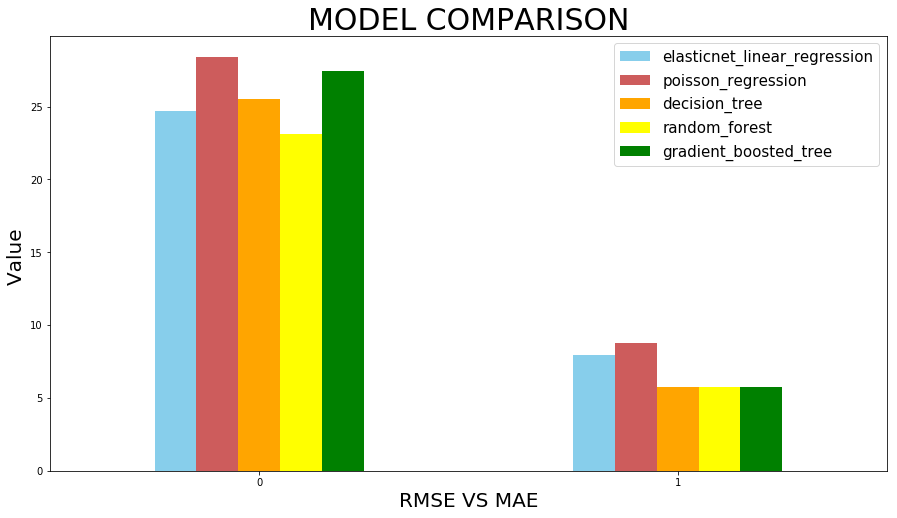

In [123]:
import matplotlib.pyplot as plt
ax = df.plot.bar(color=["SkyBlue","IndianRed","Orange","Yellow","Green"], 
                 rot=0,figsize=(15,8))
ax.set_xlabel("RMSE VS MAE", size = 20)
ax.set_ylabel("Value ",size = 20)
plt.legend(loc=1, prop={'size': 15})
plt.title('MODEL COMPARISON', fontsize=30)
plt.show()

  ---------> Taking into account both source of errors, **the best model is the random forest with default parameters** <--------

### CONCLUSION

  * In this analysis i used the current models available using DataFrame API available using the library MLlib
    https://spark.apache.org/docs/latest/ml-guide.html.
    
    
  * It should be notice that other models are available converting data into RDD. 
  
    Here  -- > (~/spark-2.4.2-bin-hadoop2.7/examples/src/main/python) it is possible to find many built-in models  for classification / regressions problems